In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
d1={
    "Name":pd.Series(["Nikita","Jayant","Pisu","Hritik","isha","Aakansha"]),
    "Division":pd.Series(["A","A","B","C","D","C"]),
    "Marks1":pd.Series([90,100,np.nan,86,92,12]),
    "Marks2":pd.Series([91,10,81,2,20,np.nan])
}
data=pd.DataFrame(d1)

In [5]:
data

,Name,Division,Marks1,Marks2
0,Nikita,A,90.0,91.0
1,Jayant,A,100.0,10.0
2,Pisu,B,NaN,81.0
3,Hritik,C,86.0,2.0
4,isha,D,92.0,20.0
5,Aakansha,C,12.0,NaN


In [6]:
d1.keys()

dict_keys(['Name', 'Division', 'Marks1', 'Marks2'])

In [7]:
data.info

<bound method DataFrame.info of        Name Division  Marks1  Marks2
0    Nikita        A    90.0    91.0
1    Jayant        A   100.0    10.0
2      Pisu        B     NaN    81.0
3    Hritik        C    86.0     2.0
4      isha        D    92.0    20.0
5  Aakansha        C    12.0     NaN>

In [8]:
data.describe()

,Marks1,Marks2
count,5.000000,5.000000
mean,76.000000,40.800000
std,36.138622,41.901074
min,12.000000,2.000000
25%,86.000000,10.000000
50%,90.000000,20.000000
75%,92.000000,81.000000
max,100.000000,91.000000


In [9]:
data.shape

(6, 4)

In [10]:
data.isna().sum()

Name        0
Division    0
Marks1      1
Marks2      1
dtype: int64

In [11]:
data["Marks1"]=data["Marks1"].fillna(data["Marks1"].mean())

In [12]:
data

,Name,Division,Marks1,Marks2
0,Nikita,A,90.0,91.0
1,Jayant,A,100.0,10.0
2,Pisu,B,76.0,81.0
3,Hritik,C,86.0,2.0
4,isha,D,92.0,20.0
5,Aakansha,C,12.0,NaN


In [14]:
data["Marks2"]=data["Marks2"].fillna(data["Marks2"].mean())

In [15]:
data

,Name,Division,Marks1,Marks2
0,Nikita,A,90.0,91.0
1,Jayant,A,100.0,10.0
2,Pisu,B,76.0,81.0
3,Hritik,C,86.0,2.0
4,isha,D,92.0,20.0
5,Aakansha,C,12.0,40.8


<Axes: xlabel='Marks1'>

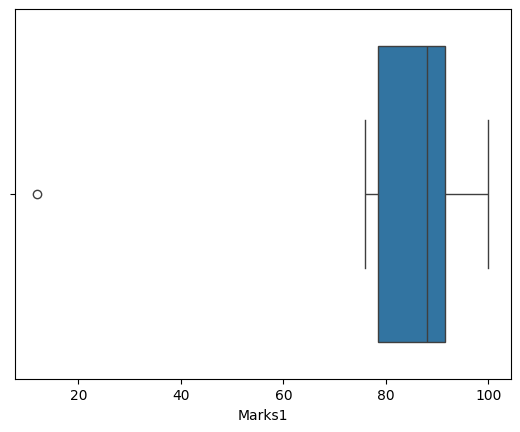

In [17]:
sns.boxplot(data=data,x="Marks1")

<Axes: xlabel='Marks2'>

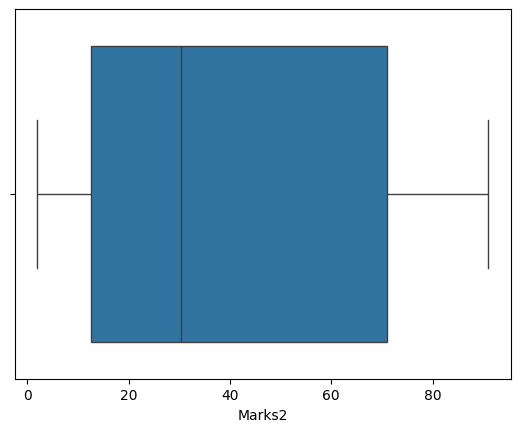

In [18]:
sns.boxplot(data=data,x="Marks2")

In [37]:
def detect_outlier(d):
    q1=d.quantile(0.25)
    q3=d.quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=d[(d<lower_bound)|(d>upper_bound)]
    return outliers
    

In [38]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1
    # print(Q1,Q3,IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [39]:
o=detect_outlier(data["Marks1"])
o

5    12.0
Name: Marks1, dtype: float64

In [44]:
data=data[~data["Marks1"].isin(o)]

<Axes: xlabel='Marks1'>

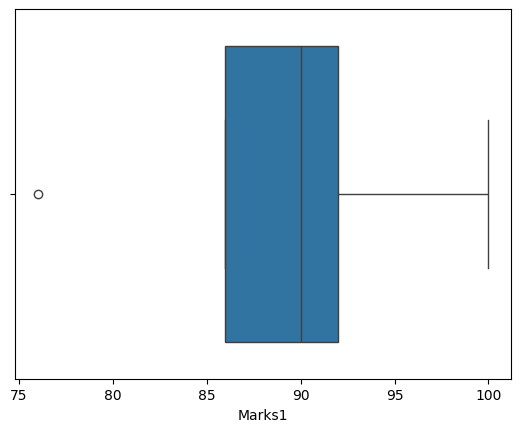

In [46]:
data
sns.boxplot(data=data,x="Marks1")